Precision: 0.9741902085490312
Recall: 0.9248104465037911
F1-score: 0.9488583159259526
Confusion Matrix:
[[55354  1396]
 [ 4284 52692]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



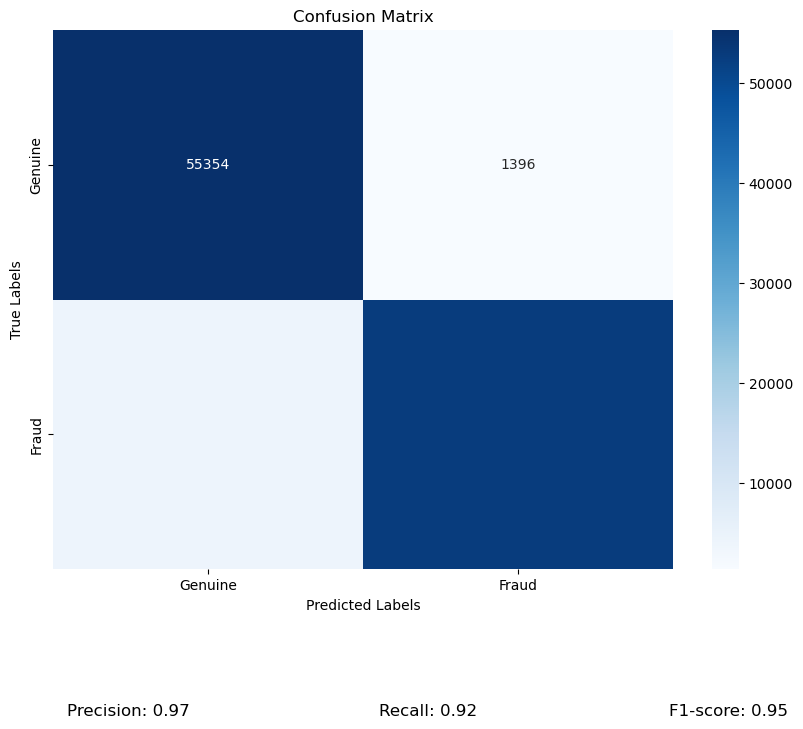

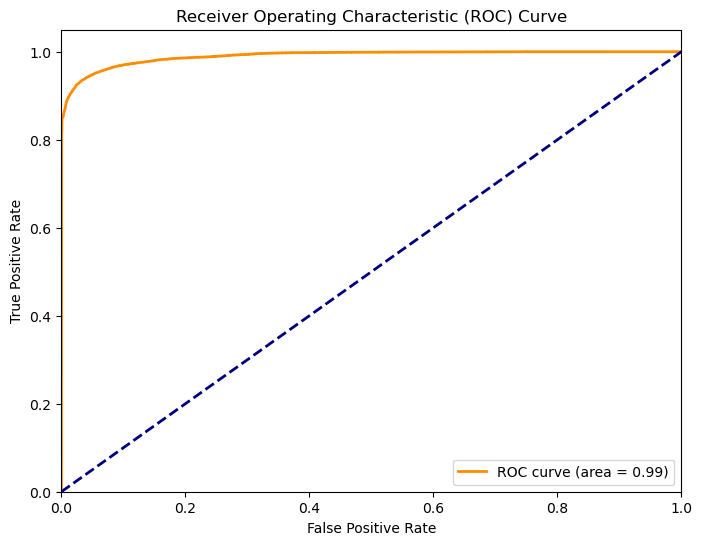

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Load the dataset
# Replace 'credit_card_data.csv' with your actual file path
data = pd.read_csv('creditcard.csv')

# Preprocess the data
# Assuming 'Class' is the target variable and other columns are features
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000)
log_reg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_classifier.predict(X_test)
y_prob = log_reg_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add precision, recall, and F1 score to the plot
plt.figtext(0.2, -0.1, f"Precision: {precision:.2f}", ha="center", fontsize=12)
plt.figtext(0.5, -0.1, f"Recall: {recall:.2f}", ha="center", fontsize=12)
plt.figtext(0.8, -0.1, f"F1-score: {f1:.2f}", ha="center", fontsize=12)

plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
